# Unsupervised Learning - Hierarchical Custering
* clustering algorithms look to create clusters of data related internally, though with stark differences externally
* preprocessing for clustering can involve scaling and imputation (of missing values)
    * with R, - imputation packages can include, impute( ), Amelia, Mice, Hmisc

### Hierarchical (agglomerative) Clustering
* repeatedly combines the 2 nearest clusters into a larger cluster

### Seeds dataset - property measurements of kernels belonging to 3 different varieties of Wheat
* available at https://archive.ics.uci.edu/ml/datasets/seeds#

In [1]:
set.seed(786)

file_loc <- '../../Downloads/seeds_dataset.txt'

seeds_df <- read.csv(file_loc, sep='\t', header=FALSE)

* dataset has no headers
* it is tab-separated ('\t')
* set seed, for reproducability

### Provide Column Names for the Data

In [2]:
feature_name <- c('area','perimeter','compactness','length.of.kernel','width.of.kernal',
                  'asymmetry.coefficient','length.of.kernel.groove','type.of.seed')

colnames(seeds_df) <- feature_name

### Explore this DataFrame
* using str( ), summary( ), is.na( )

In [3]:
str(seeds_df)
summary(seeds_df)
any(is.na(seeds_df))

'data.frame':	221 obs. of  8 variables:
 $ area                   : num  15.3 14.9 14.3 13.8 16.1 ...
 $ perimeter              : num  14.8 14.6 14.1 13.9 15 ...
 $ compactness            : num  0.871 0.881 0.905 0.895 0.903 ...
 $ length.of.kernel       : num  5.76 5.55 5.29 5.32 5.66 ...
 $ width.of.kernal        : num  3.31 3.33 3.34 3.38 3.56 ...
 $ asymmetry.coefficient  : num  2.22 1.02 2.7 2.26 1.35 ...
 $ length.of.kernel.groove: num  5.22 4.96 4.83 4.8 5.17 ...
 $ type.of.seed           : num  1 1 1 1 1 1 1 5 NA 1 ...


      area         perimeter      compactness     length.of.kernel
 Min.   : 1.00   Min.   : 1.00   Min.   :0.8081   Min.   :0.8189  
 1st Qu.:12.11   1st Qu.:13.43   1st Qu.:0.8577   1st Qu.:5.2447  
 Median :14.13   Median :14.29   Median :0.8735   Median :5.5180  
 Mean   :14.29   Mean   :14.43   Mean   :0.8713   Mean   :5.5639  
 3rd Qu.:17.09   3rd Qu.:15.69   3rd Qu.:0.8877   3rd Qu.:5.9798  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.6750  
 NA's   :1       NA's   :9       NA's   :14       NA's   :11      
 width.of.kernal asymmetry.coefficient length.of.kernel.groove  type.of.seed  
 Min.   :2.630   Min.   :0.7651        Min.   :3.485           Min.   :1.000  
 1st Qu.:2.956   1st Qu.:2.6002        1st Qu.:5.045           1st Qu.:1.000  
 Median :3.245   Median :3.5990        Median :5.226           Median :2.000  
 Mean   :3.281   Mean   :3.6935        Mean   :5.408           Mean   :2.084  
 3rd Qu.:3.566   3rd Qu.:4.7687        3rd Qu.:5.879           3rd Qu

[1] TRUE

* all columns have Numerical data

In [5]:
seeds_df <- na.omit(seeds_df)

### Create a variable for the labels - Remove the 'type.of.seed' column prior to Clustering

In [6]:
seeds_label <- seeds_df$type.of.seed
seeds_df$type.of.seed <- NULL
str(seeds_df)

'data.frame':	199 obs. of  7 variables:
 $ area                   : num  15.3 14.9 14.3 13.8 16.1 ...
 $ perimeter              : num  14.8 14.6 14.1 13.9 15 ...
 $ compactness            : num  0.871 0.881 0.905 0.895 0.903 ...
 $ length.of.kernel       : num  5.76 5.55 5.29 5.32 5.66 ...
 $ width.of.kernal        : num  3.31 3.33 3.34 3.38 3.56 ...
 $ asymmetry.coefficient  : num  2.22 1.02 2.7 2.26 1.35 ...
 $ length.of.kernel.groove: num  5.22 4.96 4.83 4.8 5.17 ...
 - attr(*, "na.action")= 'omit' Named int  8 9 37 38 63 64 72 73 111 112 ...
  ..- attr(*, "names")= chr  "8" "9" "37" "38" ...


### Normalize the DataFrame (which is without the 'type.of.seed' column)
* using scale( )

In [7]:
seeds_df_sc <- as.data.frame(scale(seeds_df))
summary(seeds_df_sc)

      area           perimeter        compactness      length.of.kernel 
 Min.   :-1.4825   Min.   :-1.6680   Min.   :-2.6891   Min.   :-1.6776  
 1st Qu.:-0.8866   1st Qu.:-0.8591   1st Qu.:-0.5879   1st Qu.:-0.8480  
 Median :-0.1674   Median :-0.1723   Median : 0.1110   Median :-0.2303  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8686   3rd Qu.: 0.9227   3rd Qu.: 0.6857   3rd Qu.: 0.8090  
 Max.   : 2.1443   Max.   : 2.0254   Max.   : 2.0364   Max.   : 2.3261  
 width.of.kernal    asymmetry.coefficient length.of.kernel.groove
 Min.   :-1.67987   Min.   :-1.99450      Min.   :-1.8300        
 1st Qu.:-0.82214   1st Qu.:-0.76760      1st Qu.:-0.7604        
 Median :-0.05427   Median :-0.04637      Median :-0.3910        
 Mean   : 0.00000   Mean   : 0.00000      Mean   : 0.0000        
 3rd Qu.: 0.79025   3rd Qu.: 0.74759      3rd Qu.: 0.9302        
 Max.   : 2.02861   Max.   : 3.13764      Max.   : 2.2921        

* each Mean is now 0

### Create a Distance Matrix
* using Euclidean distance

In [8]:
dist_mat <- dist(seeds_df_sc, method='euclidean')

### Build a Dendrogram
* using hclust( )
* method defines the type of linkage

#### Dendrograms - categorize objects into a hierarchy - split distances measured by y - clusters merge as they ascend

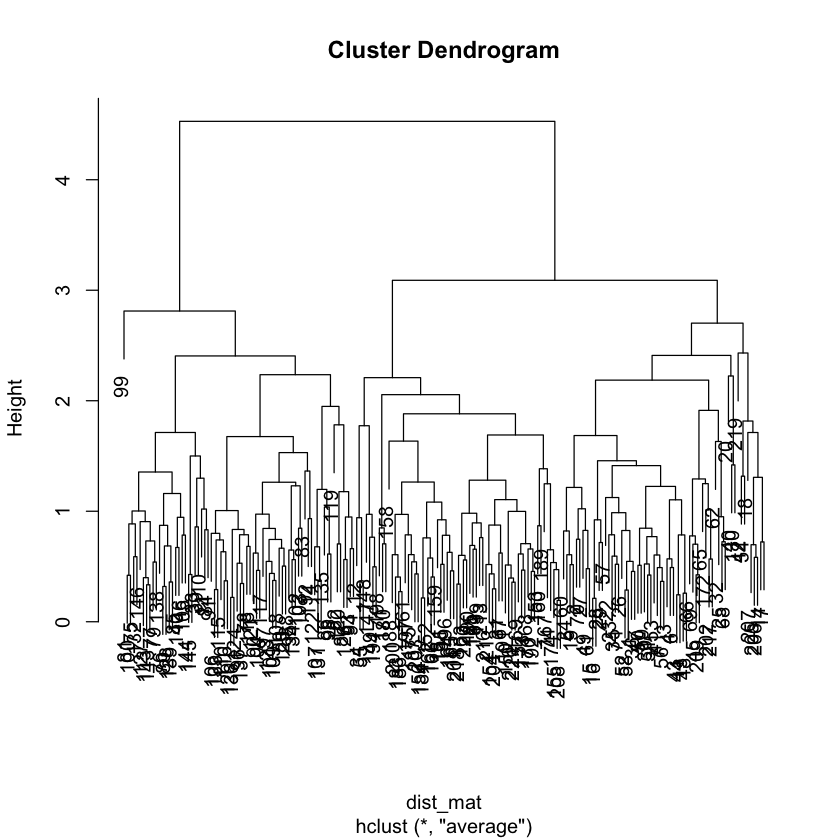

In [9]:
hclust_avg <- hclust(dist_mat, method='average')

plot(hclust_avg)

### The dendrogram can be cut to the desired number of Clusters
* There are 3 types of Wheat - set k = 3
    * this can be seen in the dendrogram at h = 3
* use cutree( )

In [10]:
cut_avg <- cutree(hclust_avg, k = 3)

### Visualize these 3 Clusters
* abline( ) - can be used to draw the cut line 
* rect.hclust( ) - can be used to superimpose rectangular compartments for each cluster

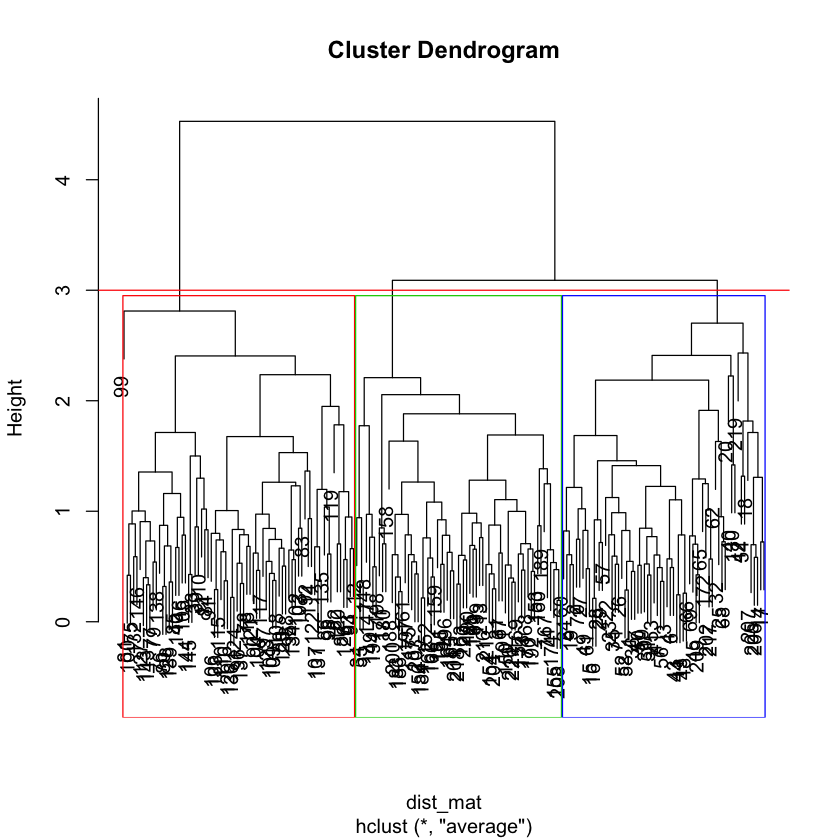

In [11]:
plot(hclust_avg)

rect.hclust(hclust_avg, k = 3, border = 2:6)

abline(h = 3, col = 'red')

* the clusters are now enclosed in different colors
* use color_branches( ) to see the tree branches as different colors

In [12]:
install.packages('dendextend')


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//Rtmp3qJRii/downloaded_packages


Warning message:
“package ‘dendextend’ was built under R version 3.5.2”

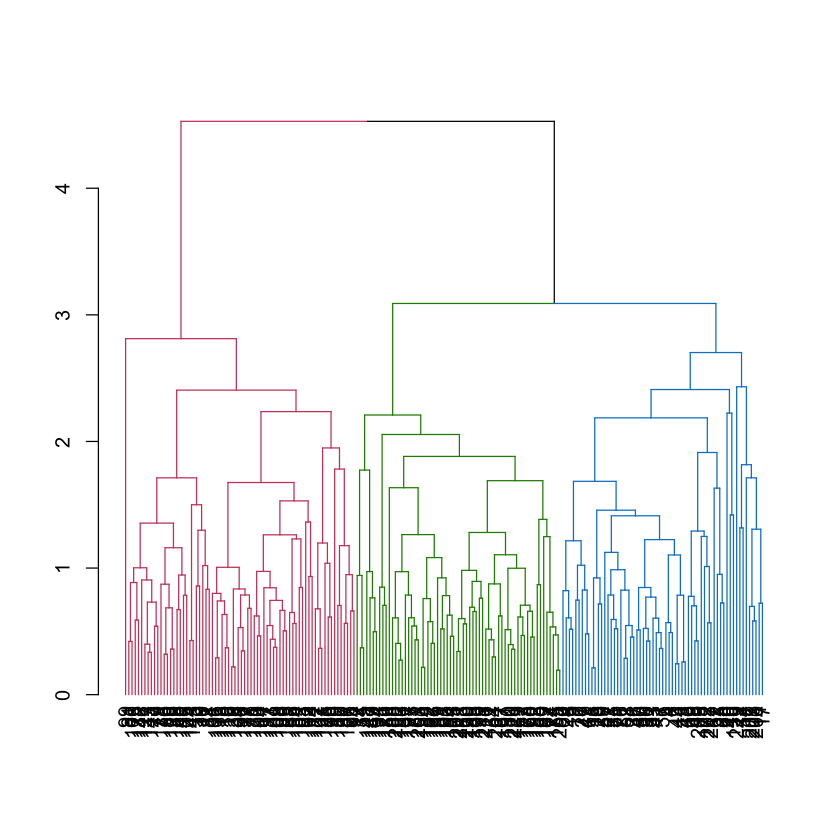

In [13]:
suppressPackageStartupMessages(library(dendextend))

avg_dend_obj <- as.dendrogram(hclust_avg)

avg_col_dend <- color_branches(avg_dend_obj, h = 3)

plot(avg_col_dend)

### Assign the Cluster results to the original dataframe - Count the observations assigned to each cluster
* use mutate( )
* use count( )

In [14]:
suppressPackageStartupMessages(library(dplyr))

seeds_df_cl <- mutate(seeds_df, cluster = cut_avg)

count(seeds_df_cl,cluster)

Warning message:
“package ‘dplyr’ was built under R version 3.5.2”

cluster,n
1,63
2,72
3,64


* there appear to be around 70 observations of each type of Wheat

### Evaluate the relationship between 2 features (based on the clustering results)
* analyze the trend between Perimeter & Area

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

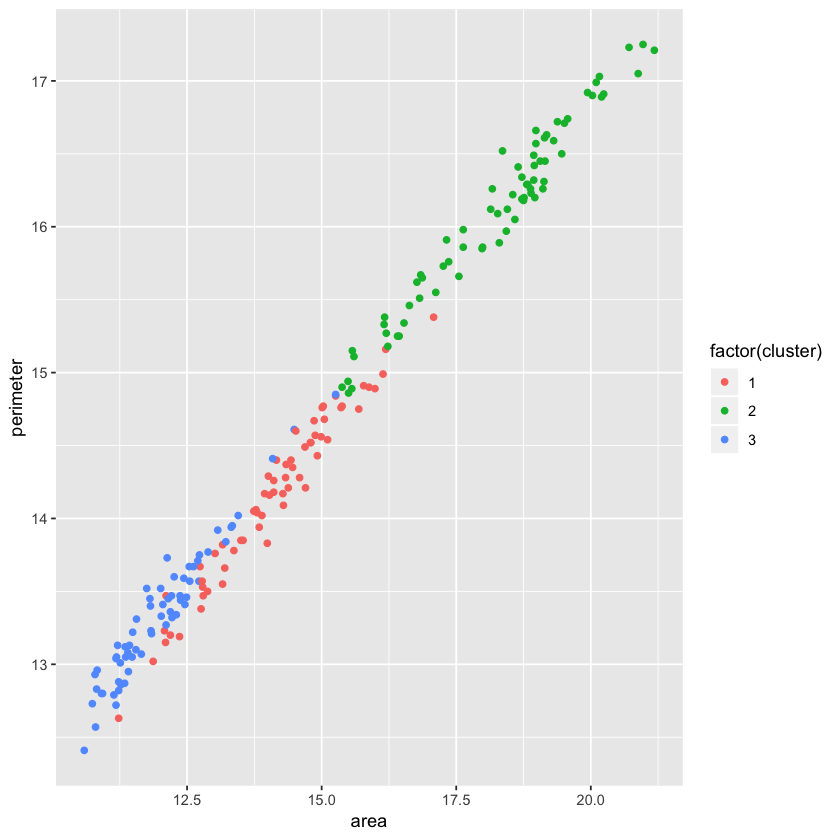

In [15]:
suppressPackageStartupMessages(library(ggplot2))

ggplot(seeds_df_cl, aes(x=area, y = perimeter, color = factor(cluster))) + geom_point()

#### There appears to be a Linear relationship between Perimeter and Area - regardless of Wheat type

## Cross-check Clustering results
* use table( )

In [16]:
table(seeds_df_cl$cluster, seeds_label)

   seeds_label
     1  2  3
  1 54  1  8
  2  5 67  0
  3  7  0 57

#### The Clustering was not perfect, but reasonably accurate